In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np

In [47]:
data = pd.read_csv('Datasets/balance-scale.csv')
data.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [48]:
x = data.iloc[:,1:]
x.head()

,L-Weight,L-Distance,R-Weight,R-Distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [49]:
y = data['Class']
y.head()

0    B
1    R
2    R
3    R
4    R
Name: Class, dtype: object

In [50]:
x = x.values
x

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=int64)

In [51]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

In [53]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [54]:
print(model.score(x_test, y_test))

0.89171974522293


In [55]:
print(model.predict([[0,0,2,4]]))

[2]


In [56]:
y_pred = model.predict(x_test)
conf = confusion_matrix(y_test, y_pred)
print(conf)                                                                                                               

[[ 0  4  8]
 [ 0 70  3]
 [ 0  2 70]]


In [57]:
print("Accuracy Score : "+ str(accuracy_score(y_test, y_pred)))

Accuracy Score : 0.89171974522293


In [58]:
print("Recall Score : "+ str(recall_score(y_test, y_pred, average=None)))

Recall Score : [0.         0.95890411 0.97222222]


In [59]:
print("Precision Score : "+ str(precision_score(y_test, y_pred, average=None, zero_division=0)))

Precision Score : [0.         0.92105263 0.86419753]


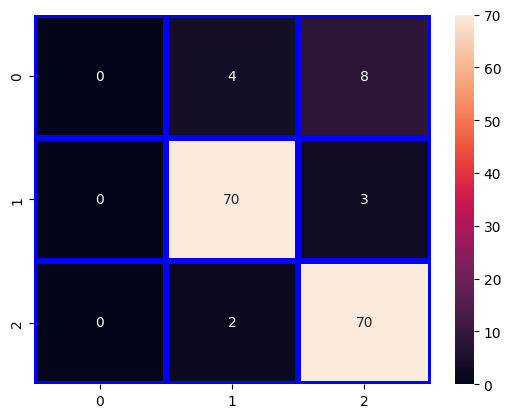

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf, annot=True, linewidths=3, linecolor='blue')
plt.show()